# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [562]:
import pandas as pd 
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

#1
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [564]:
#2
df.loc[df.visits >= 3]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [565]:
#3
df.loc[(df.visits >= 3) & (df.animal == 'cat')]

,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [566]:
#4
df.visits.sum()

19

In [567]:
#5
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [568]:
#6
new_row = ['monkey', 6, 4, 'yes']
df.loc['k'] = new_row
print(df)

df = df.drop(labels='k')
df

   animal  age  visits priority
a     cat  2.5       1      yes
b     cat  3.0       3      yes
c   snake  0.5       2       no
d     dog  NaN       3      yes
e     dog  5.0       2       no
f     cat  2.0       3       no
g   snake  4.5       1       no
h     cat  NaN       1      yes
i     dog  7.0       2       no
j     dog  3.0       1       no
k  monkey  6.0       4      yes


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [574]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

#1
df2 = pd.DataFrame(data=set(df['A']), columns = ['A'])
df2

#2
df3 = df.drop_duplicates() 
df3.reset_index(drop=True)


,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [577]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

print(df.sum())

df.columns[df.sum().argmin()]

a    1.992370
b    3.601331
c    2.248063
d    3.002901
e    1.469158
f    1.888577
g    2.495653
h    1.905916
i    2.362997
j    2.644296
dtype: float64


'e'

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [122]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

len(df.drop_duplicates())

7

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [156]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

top_3 = df.groupby('grps')['vals'].nlargest(3)
top_3.groupby('grps').sum()

grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [233]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'][1,3] = [10055, 10075]
# using dictionary to convert specific columns 
convert_dict = {'FlightNumber': int} 
  
df = df.astype(convert_dict) 
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [234]:
# or

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [235]:
df['From'] = df['From_To'].str.split("_").str[0]
df['To'] = df['From_To'].str.split("_").str[1]
df = df.drop(columns='From_To')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [236]:
df['From'] = df['From'].str.title()
df['To'] = df['To'].str.title()

df['Airline']=df['Airline'].str.extract('([aA-zZ][\w\s]+)')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [587]:
# made into string to split by "."

df = pd.read_csv('data/country_total.csv')
df.month = df.month.astype(str)

df['year'] = df['month'].str.split(".").str[0]
df['month'] = df['month'].str.split(".").str[1]
df
# replaced problematic '1' (see row 20795) with 10
# returned columns into int

df['month'] = df['month'].replace('1','10')
df.month = df.month.astype(int)
df.year = df.year.astype(int)
df

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1,171000,4.5,1993
1,at,nsa,2,175000,4.6,1993
2,at,nsa,3,166000,4.4,1993
3,at,nsa,4,157000,4.1,1993
4,at,nsa,5,147000,3.9,1993
...,...,...,...,...,...,...
20791,uk,trend,6,2429000,7.7,2010
20792,uk,trend,7,2422000,7.7,2010
20793,uk,trend,8,2429000,7.7,2010
20794,uk,trend,9,2447000,7.8,2010


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [594]:
df = pd.read_csv('data/country_sex_age.csv')

#1 average unemployment_rate for: each gender
df.groupby('sex')['unemployment_rate'].mean()


sex
f    12.982629
m    11.671026
Name: unemployment_rate, dtype: float64

In [595]:
#2 average unemployment_rate for: each age group
df.groupby('age_group')['unemployment_rate'].mean()


age_group
y25-74     6.905394
y_lt25    17.774057
Name: unemployment_rate, dtype: float64

In [599]:
#3 average unemployment_rate for: both
df['seasonality'].isna().unique()

df.groupby(['sex', 'age_group', 'seasonality'])['unemployment_rate'].mean()

# No values missing for seasonality (as seen by df['seasonality'].isna().unique()),
# so can group over it as done above ^^ 
# or can group by seasonality as shown below. 

sex  age_group  seasonality
f    y25-74     nsa             7.539839
                sa              7.579982
                trend           7.579934
     y_lt25     nsa            18.818593
                sa             18.323837
                trend          18.231025
m    y25-74     nsa             6.201653
                sa              6.256909
                trend           6.272703
     y_lt25     nsa            17.215211
                sa             17.067671
                trend          17.013327
Name: unemployment_rate, dtype: float64

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [652]:
df = pd.read_csv('data/country_sex_age.csv')

df['population'] = df['unemployment']/(df['unemployment_rate']/100)

each_country = df.groupby(['sex', 'age_group', 'seasonality'])['population'].mean()
each_country


sex  age_group  seasonality
f    y25-74     nsa            3.006779e+06
                sa             3.360649e+06
                trend          3.289520e+06
     y_lt25     nsa            5.270112e+05
                sa             5.876348e+05
                trend          5.848969e+05
m    y25-74     nsa            4.110194e+06
                sa             4.533201e+06
                trend          4.423824e+06
     y_lt25     nsa            6.354751e+05
                sa             6.867673e+05
                trend          6.809973e+05
Name: population, dtype: float64

# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [653]:
df = pd.read_csv('data/tennis.csv')
 #1 How many games did Federer win?
x = df.win.sum()

f' Federer won: {x} games'

' Federer won: 972 games'

In [654]:
#2 What is Federer's win/loss ratio?
x = df.win.sum() / (len(df) - df.win.sum())

f'win/loss ratio is: {x}'


'win/loss ratio is: 4.695652173913044'

In [715]:
#3 Federer's top 5 opponents: 
# a) Here, the top 5 opponents that won most often against Federer
df = pd.read_csv('data/tennis.csv')

x = df3 = (df.groupby('player2 name')['win'].count() -      #number of games minus
       df.groupby('player2 name')['win'].sum())             #number of times Federer won. 
     
df3.sort_values(ascending = False).head()

player2 name
Rafael Nadal        18.0
Novak Djokovic      13.0
Andy Murray         10.0
David Nalbandian     8.0
Lleyton Hewitt       8.0
Name: win, dtype: float64

In [716]:
#3 Who were Federer's top 5 opponents?
# b) Here, the top 5 oppoenents that played the most games against Federer

df1 = df[['player1 name', 'player2 name', 'winner']]
df1['gamesplayed'] = 1

(df1.groupby('player2 name')   
    .sum()
    .sort_values('gamesplayed', ascending = False)
    .drop('N/A Bye')
    .head(5))

,gamesplayed
player2 name,
Novak Djokovic,29
Rafael Nadal,28
Lleyton Hewitt,26
Andy Roddick,24
Andy Murray,19


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [504]:
df = pd.read_csv('data/tennis.csv')

df['tournament prize money'] = df['tournament prize money'].replace('[A\$,\ ]', "", regex=True)
df['tournament prize money'] = df['tournament prize money'].replace('',np.nan).astype(float)

df_win = df.loc[(df['tournament prize money'] > 0) & (df['win'] == True)]
df_win = df.sort_values(by='tournament prize money', ascending=False)

max_num = df_win['tournament prize money'].max()
df_fin = df_win.loc[df_win['tournament prize money'] == max_num]
f'Best year in terms of money: {df_fin.iloc[0,0]}'

'Best year in terms of money: 2007'

In [505]:
# b) number of wins
df = pd.read_csv('data/tennis.csv')

f"Best year in terms of wins: {df.groupby('year')['win'].sum().idxmax()}"

'Best year in terms of wins: 2006'

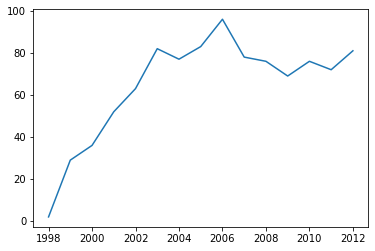

In [531]:
#2. Did Federer get better or worse over time?
df3 = df.groupby('year')['win'].sum()

import matplotlib.pyplot as plt 
plt.plot(df3)

# As shown in the graph, Federer got better until 2006 then more or less stayed the same. 

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [618]:
df = pd.read_csv('data/tennis.csv')

df['tournament prize money'] = df['tournament prize money'].replace('[A\$,\ ]', "", regex=True)
df['tournament prize money'] = df['tournament prize money'].replace('',np.nan).astype(float)


df_win = df[df['tournament round'] == 'F']
f"Federer won: ${int(df_win['tournament prize money'].sum())}"


'Federer won: $54761874'